In [5]:


import numpy as np
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/Users/ilia/brainTumorClassification/archive-2/Brain Tumor Data Set/Brain Tumor Data Set'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        pass

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [60]:
gen = ImageDataGenerator(
    rescale=1./255,
    validation_split = 0.2,
    zoom_range=(0.99,0.1),
    rotation_range=30,      # Поворот
    width_shift_range=0.2,  # Сдвиги по ширине
    height_shift_range=0.2, # Сдвиги по высоте
    horizontal_flip=True,
    dtype=np.float32)

In [62]:
train = gen.flow_from_directory('/Users/ilia/brainTumorClassification/archive-2/Brain Tumor Data Set/Brain Tumor Data Set',
                               target_size = (150,150),
                               batch_size = 256,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "training")

Found 3681 images belonging to 2 classes.


In [64]:
val = gen.flow_from_directory('/Users/ilia/brainTumorClassification/archive-2/Brain Tumor Data Set/Brain Tumor Data Set',
                               target_size = (150,150),
                               batch_size = 8,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "validation")
classes = val.class_indices

Found 919 images belonging to 2 classes.


In [66]:
classes

{'Brain Tumor': 0, 'Healthy': 1}

In [68]:
import seaborn as sns

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

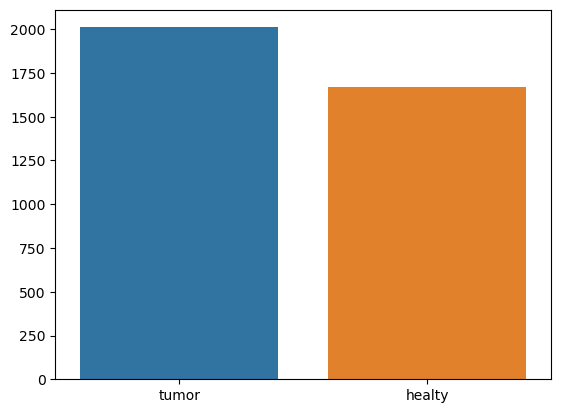

In [70]:
t=0
h=0
for i in range(15):
    a, b = next(train)
    for j in b:
        if j == 1:
            h+=1
        else:t+=1

sns.barplot(x=['tumor','healty'],y=[t,h])
    

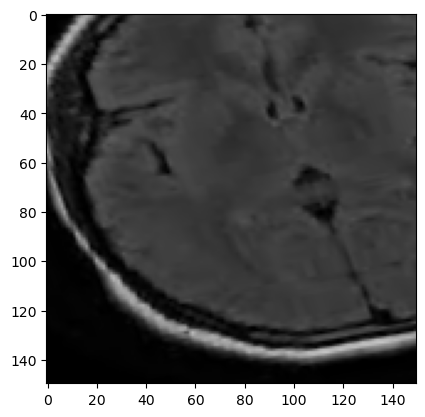

In [72]:
import matplotlib.pyplot as plt
batch = next(train)

plt.imshow(batch[0][0])

# Simple cnn

In [75]:
from keras.layers import Conv2D, MaxPool2D, LeakyReLU, BatchNormalization, Dropout, Dense, InputLayer, Flatten
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam

In [77]:
model = keras.Sequential()
model.add(InputLayer(input_shape=(150,150,3)))
model.add(Conv2D(filters=32,kernel_size=3, activation="relu", padding="same"))
model.add(MaxPool2D())
model.add(Conv2D(filters=64,kernel_size=3, activation="relu", padding="same"))
model.add(MaxPool2D())


model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer=Adam(0.001),loss = BinaryCrossentropy(),metrics=['accuracy'])


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [79]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 87616)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,214,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,243,457 (42.89 MB)

 Trainable params: 11,243,073 (42.89 MB)

 Non-trainable params: 384 (1.50 KB)

In [84]:
from keras import utils, callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", 
                                        patience=5, restore_best_weights = True)

In [64]:
history = model.fit(train,verbose=1,callbacks = [earlystopping],epochs=20,validation_data=(val))

Epoch 1/20
15/15 [==============================] - 35s 2s/step - loss: 0.6694 - accuracy: 0.6592 - val_loss: 0.6009 - val_accuracy: 0.7421
Epoch 2/20
15/15 [==============================] - 34s 2s/step - loss: 0.3897 - accuracy: 0.8149 - val_loss: 0.3458 - val_accuracy: 0.8487
Epoch 3/20
15/15 [==============================] - 34s 2s/step - loss: 0.2338 - accuracy: 0.9130 - val_loss: 0.3323 - val_accuracy: 0.9042
Epoch 4/20
15/15 [==============================] - 35s 2s/step - loss: 0.1310 - accuracy: 0.9603 - val_loss: 0.2489 - val_accuracy: 0.9554
Epoch 5/20
15/15 [==============================] - 34s 2s/step - loss: 0.0840 - accuracy: 0.9776 - val_loss: 0.2222 - val_accuracy: 0.9761
Epoch 6/20
15/15 [==============================] - 34s 2s/step - loss: 0.0539 - accuracy: 0.9848 - val_loss: 0.1802 - val_accuracy: 0.9902
Epoch 7/20
15/15 [==============================] - 33s 2s/step - loss: 0.0295 - accuracy: 0.9956 - val_loss: 0.1530 - val_accuracy: 0.9891
Epoch 8/20
15/15 [==

# Plotting accuracy

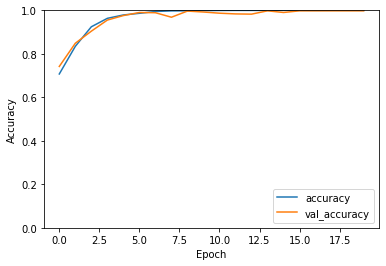

In [67]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# Plotting loss

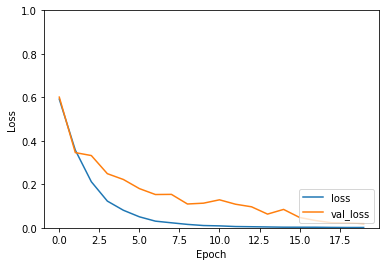

In [68]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')